# __Honey Bee Roundup__

![title](https://cdn.discordapp.com/attachments/415980182021603329/1039616840978149468/bee.png)

### Technical Goals:


<div class="alert alert-block alert-info">
Our technical goals are to analyze honeybee colony data from the USDA to determine if there is a statistically significant amount of loss among colonies over time, and to develop a machine learning model that accurately predicts honeybee colony loss based on significant environmental and human-driven features. We can use these predictions to make recommendations to stakeholders to minimize colony loss and improve outcomes. </div>

### Business Goals:

Honeybees pollinate 15 billion worth of crops in the United States each year, including more than 130 types of fruits, nuts, and vegetables. Honeybees also produce honey, worth about 3.2 million in 2017 according to USDA-National Agricultural Statistics Service (NASS).

<div class="alert alert-block alert-info">
We want to provide stakeholders with an accurate model for predicting colony loss over time, which factors affect colony loss, and which areas are most conducive to colony production and preservation. We also want to provide a way for stakeholders to test outcomes based on actions they take (or not take) to mitigate colony loss. Our overarching business goal is to influence stakeholders to make responsible and proactive decisions to help honeybees thrive. </div>



---
### Hypothesis

Our initial hypothesis is that honeybee colony loss has increased over time and will continue to increase year over year if no measures are taken to mitigate or reverse this outcome. 
<br>
Some initial questions we have are:

<div class="alert alert-block alert-info">

1. How much have honeybee colonies diminished over time? Is this loss compounded year over year?

2. What significant features drive honeybee colony loss?

3. What time of year is the biggest loss?

4. What state/area suffers heaviest loss and primary factors attributing to that?

5. Does summer or winter have the largest loss?

6. Does the beekeeper to colony ratio have an effect on colony loss?
</div>


---

### Executive Summary

<div class="alert alert-block alert-info">
We trained and evaluated four linear regression models using four significant features affecting colony loss. The OLS model and the LassoLars model both performed very well, beating the baseline RMSE for colony loss by 59% percent. We selected the Lasso Lars model as our best model. The model's RMSE for the test set was 1731.07. We used this model both with randomized data and chronological data, and the model performed similarly for both sets. We recommend that states use this model to predict colony losses for the upcoming year, and to lower their beekeeper to colony ratio for significant improvements. They can use this model to see how their losses will be mitigated if they increase the number of beekeepers and/or modify their beekeeping operations based on the season. </div>

### Steps to Reproduce:
<div class="alert alert-block alert-success">

1. Download to the same location:
    - Final.ipynb (this Notebook), 
    - wrangle.py and explore.py (Our Functions created to work with this Data. [If you're looking to check our code, __look here__])
    - BeeInformed_States_Loss_Table_by_Year_public_ready_2022.csv (this is the raw BeeInformed Data), and Stressors.csv (USDA/NASS Bee Stressor Data)
2. Run notebook.
3. Enjoy! Bee Happy.
</div>


In [1]:
# user-defined functions, imports all used libraries in wrangle.py and explore.py as well.
from wrangle import *
from explore import *


## Acquisition

We Originally Started with Data found on Data.World, we then traced the data back further to the source to pull the most up-to-date Data on Bees.

For the original 3 Data sets:

- After assessement Census Data from the USDA was deemed not to have pertinent information to the current population of bees or health of hives, as well as the fact that it is reported in 5 year gaps, was removed from our initial data set.

- Survey Data by State from the USDA was also deemed as having less pertinent information on the trend in population of bees or health of their hives, and was left for further exploration as time permits due to a small amount of data on the environmental area of the colonies.

- The Bee Colony Loss Data from BeeInformed.org has the most relevant data regarding current number of colonies, number of bee keepers, and loss of bees and colonies, so was the data set we initially focused on. However, due to this privacy stipulation "For the protection of privacy, losses are reported as N/A if 10 or fewer beekeepers responded in that state. These beekeepers' losses are included in the national statistics." we decided to drop all records where the number of beekeepers were 10 or less, as most of the data was Null, and therefore not contributing towards our goal.




We further expanded our data, pulling USDA's NASS data regarding Bee Stressors. Our Data only covers from 2015 until Q2 of 2022, but it gives valuable insight on factors that affect bee and colony mortality rates.

## Preparation

For the Bee Colony Loss Data:
- We had to clean the data, dropping unneeded columns so we could do our own analysis using the data collected.
- Once the Data was cleaned, it saves as bee_colony_loss.csv and now our functions for different analysis were used, we settled upon using Time Series data, as we had ample time to split, clean, and analyse it. 
- Due to Privacy Protection, any state with less than 11 reporting beekeepers had to be reported as a null to ensure private data couldn't be gleemed from provided data. So, all observations with 10 or less beekeepers was dropped to handle the nulls. 
- All strings were stripped, lowercased, and spaces were replaced with underscores. 
- We then engineered two columns: beekeeper_colony_ratio and colony_net_gain for analysis purposes. 
- We also created dummy variables for the three categories in the season column: winter, summer, and annual.
- To further narrow the data for a more accurate count, Multistate and non_continental data was dropped. We also isolated only observations with beekeepers exclusive to their respective states as numbers were padded slightly by beekeepers who worked in several states.

For USDA's NASS Bee Stressor Data, while it came as a .csv, it was not in a good format to be read as a .csv, and was in a separate .csv for each quarter. We went in by hand to ensure the columns were just one line of input, no table descriptions were loaded in condensing the columns, and all - values that signified 0 were changed to 0 with find and replace. Once the Data was readable in Python we loaded it in and .append() the dataframes together, insuring no overlap in time reported. They were then saved as __Stressors.csv__ for our and others ease of use later.

In [2]:
# Takes the dirty bee data, cleans it, saves the Dataframe as bee_colony_loss.csv, then further selects the annual bee data to return as a data frame.
df = bee_wrangle()
# acquires time series dataframe using function from wrangle.py and the newly created bee_colony_loss.csv and saves to a variable
ts_df = ts_bee_prep()

In [3]:
# confirm acquisition
ts_df.head()
# Our New Columns and Dummy Columns have been generated properly, and display well.

,state,year,season,beekeepers,total_loss,average_loss,starting_colonies,colonies_lost,ending_colonies,beekeepers_exclusive_to_state,colonies_exclusive_to_state,annual,summer,winter,colonies_net_gain,beekeeper_colony_ratio
104,alabama,2008-10-01,winter,16,41.916168,29.610216,4848,2240,3104,100.0,100.0,0,0,1,-1744,194.000000
107,arkansas,2008-10-01,winter,20,17.449588,12.786836,16955,3046,14410,100.0,100.0,0,0,1,-2545,720.500000
114,georgia,2008-10-01,winter,15,34.481800,29.086689,42876,18605,35351,100.0,100.0,0,0,1,-7525,2356.733333
118,iowa,2008-10-01,winter,12,40.248963,44.931741,723,291,432,100.0,100.0,0,0,1,-291,36.000000
123,maryland,2008-10-01,winter,14,7.560976,14.746298,4013,310,3790,100.0,100.0,0,0,1,-223,270.714286


In [4]:
# split data, Train is 2011 - 2017, Validate is 2018 - 2020, and Test is 2021- Oct 2022.
train, validate, test = ts_split(ts_df)

In [5]:
# verify split
train.shape, validate.shape, test.shape
# distribution looks good for samples.

((995, 16), (409, 16), (268, 16))

In [6]:
# set year column as datetime index
train = train.set_index('year').sort_index()
validate = validate.set_index('year').sort_index()
test = test.set_index('year').sort_index()

In [7]:
# confirm train data looks good
train.head()

,state,season,beekeepers,total_loss,average_loss,starting_colonies,colonies_lost,ending_colonies,beekeepers_exclusive_to_state,colonies_exclusive_to_state,annual,summer,winter,colonies_net_gain,beekeeper_colony_ratio
year,,,,,,,,,,,,,,,
2008-10-01,alabama,winter,16,41.916168,29.610216,4848,2240,3104,100.0,100.0,0,0,1,-1744,194.000000
2008-10-01,wisconsin,winter,14,66.219008,51.694575,3472,2564,1308,100.0,100.0,0,0,1,-2164,93.428571
2008-10-01,west_virginia,winter,16,35.130581,27.295408,2174,834,1540,100.0,100.0,0,0,1,-634,96.250000
2008-10-01,utah,winter,28,24.781100,42.183693,17709,4500,13659,100.0,100.0,0,0,1,-4050,487.821429
2008-10-01,south_dakota,winter,15,48.920213,37.650885,80811,46574,48630,100.0,100.0,0,0,1,-32181,3242.000000


### Exploration

Using our Train, we'll begin some primary exploration, before delving further into stats tests.




__Questions to test our Hypothesis:__

1. How much have honeybee colonies diminished over time? Is this loss compounded year over year?

2. What state/area suffers heaviest loss? Has the highest gain?

3. Does summer or winter have the largest loss?

4. Does the beekeeper to colony ratio have an effect on colony loss?

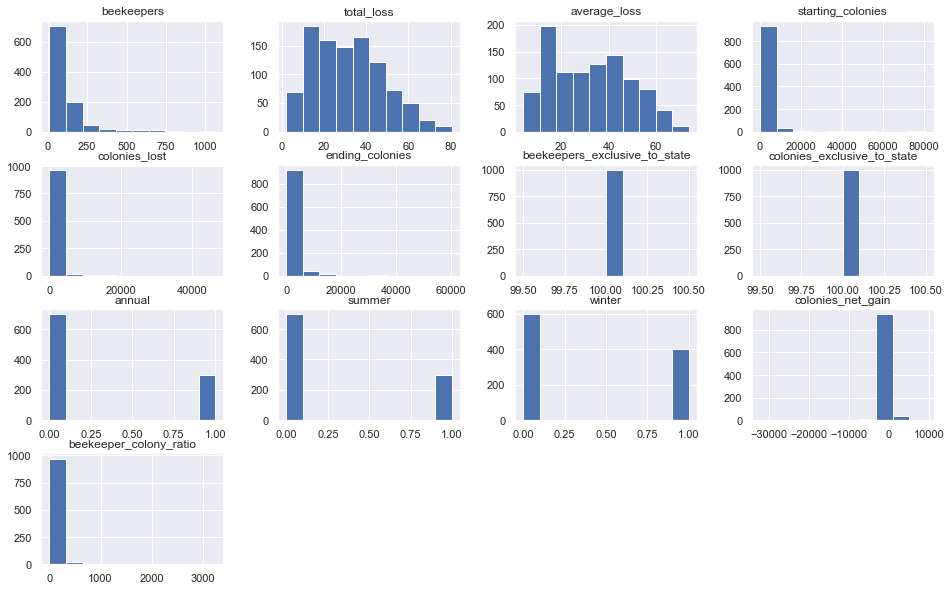

In [8]:
# preliminary univariate exploration histograms
train.hist(figsize=[16,10])
plt.show()

### Does the beekeeper to hive ratio have an effect on colony loss? If so, does a higher beekeeper to hive ratio have less or more loss?

<Figure size 1152x648 with 0 Axes>

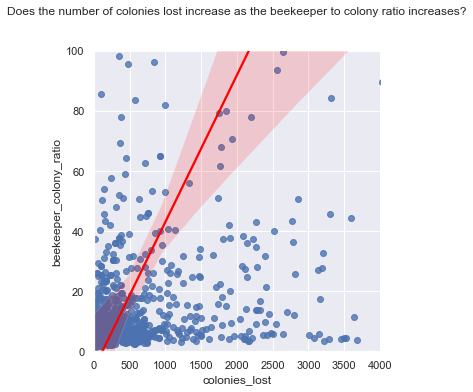

In [9]:
# relationship between total_loss and beekeepers with regression line
plt.figure(figsize=[16,9])
#use lmplot
sns.lmplot(x='colonies_lost', y='beekeeper_colony_ratio', data=train, line_kws={'color': 'red'})
#set limit in x axis
plt.xlim([0,4000])
#set limit in y axis
plt.ylim([0,100])
#set title
plt.title('Does the number of colonies lost increase as the beekeeper to colony ratio increases?', y=1.1)
plt.show()

- It appears that larger the beekeeper colony ratio, larger is the colony lost.
- We can do stat test to confirm that as below

#### Statistical test for correlation between colonies_lost and beekeeper_colony_ratio

H0: There is no relationship between the number of colonies lost annually and the beekeeper to colony ratio.

Ha: There is a relationship between the number of colonies lost annually and the beekeeper to colony ratio.
Stats test: correlation (continuous & continuous)

In [10]:
#run Pearson's Correlation Coefficient test
corr, p = stats.pearsonr(train.beekeeper_colony_ratio, train.colonies_lost)
#set alpha
alpha = .05
if p < alpha:
    print('We reject the null hypothesis.')

else:
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis.


### How many colonies diminished over time? (State/Overall)

In [11]:
#subset data to annual only
annual = train[train.annual == 1]

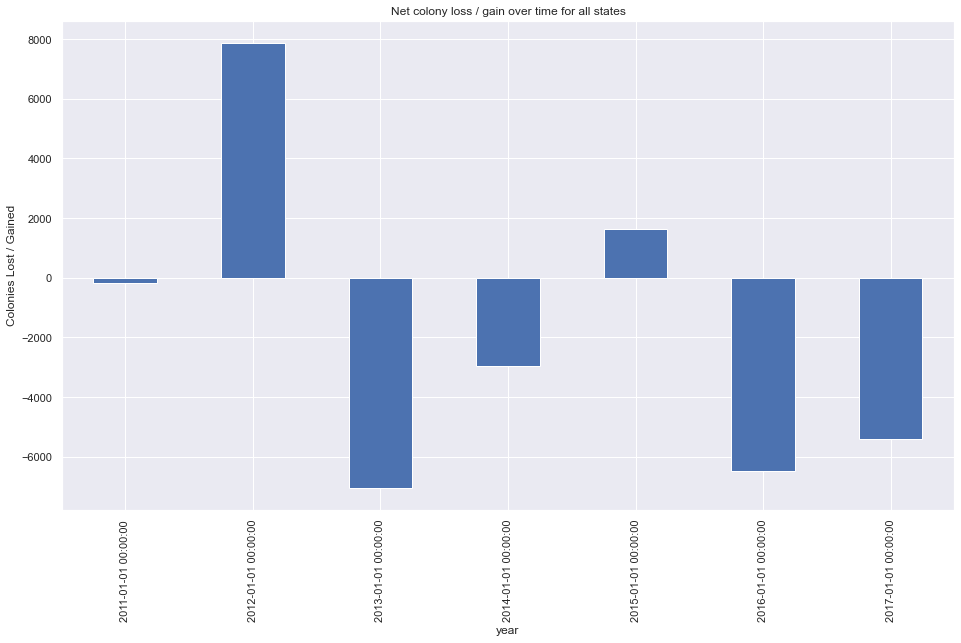

In [12]:
# group by year and visualize colonies net gain throughout years
annual.groupby('year').colonies_net_gain.sum().plot.bar(figsize=[16,9], title='Net colony loss / gain over time for all states',
                                                      ylabel='Colonies Lost / Gained')
plt.show()

- In 5 out of 7 years, there has been net loss in colonies
- There was biggest net gain in 2012 followed by biggest net loss in 2013  

### Which state suffered the heaviest loss? Which state has the least loss / highest gain?

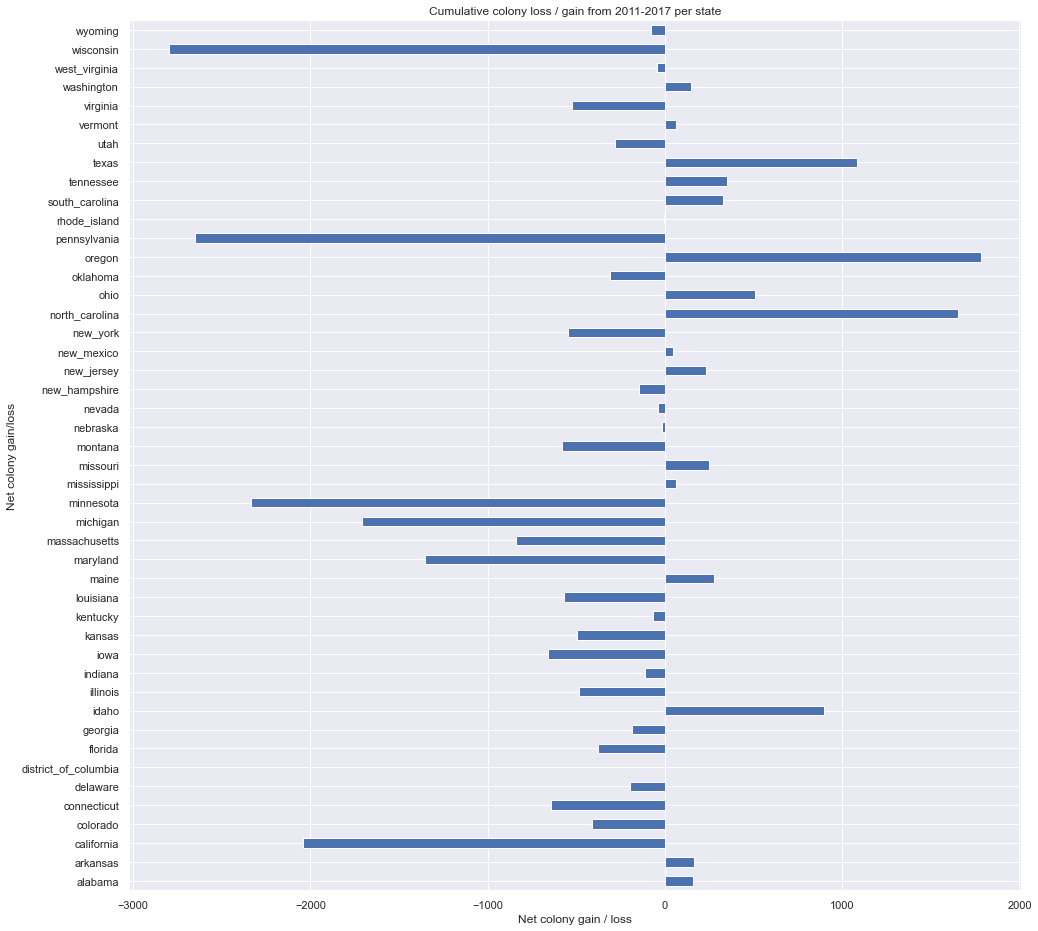

In [13]:
#group by state and visualise colonies net gain in all states
annual.groupby(['state']).colonies_net_gain.sum().plot.barh(figsize=[16,16], title='Cumulative colony loss / gain from 2011-2017 per state',
                                                      xlabel='Net colony gain/loss')
plt.xlabel('Net colony gain / loss')
plt.show()

- More states are in net colony loss 
- States like Wisconsin, Pennslyvania, Minnestota and California lead in biggest net loss in colonies
- Colonies seem to thrive in states like Oregon, North Carolina, Texas and Idaho 

### Does Winter or Summer have the largest loss?

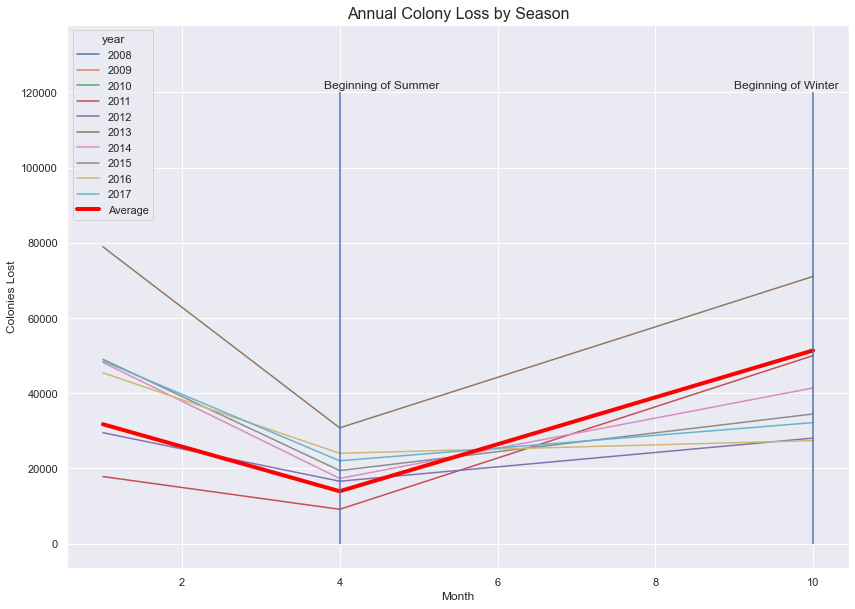

In [14]:
# call in function to visualise colony loss by season and year
largest_loss(train)

- More colonies are lost in the winter than in the summer every year.

### Statistical test for significant difference between colonies lost in winter and colonies lost in summer

- H0: There is no difference between the number of colonies lost in the summer and the number of colonies lost in the winter.

- Ha: There is a difference between the number of colonies lost in the summer and the number of colonies lost in the winter.

- Stats test: T-test (categorical & continuous)

In [15]:
#set up for varience test
#define alpha
alpha = .05
#run levene test for varience test
stat, pval = stats.levene(train.colonies_lost[train.season=='summer'], 
                          train.colonies_lost[train.season=='winter'])

In [16]:
if pval < alpha:
    print('We can reject the null hypothesis of equal variances.')
else:
    print('We fail to reject the null hypothesis that variance is equal.')

We can reject the null hypothesis of equal variances.


In [17]:
#set up for 2 sample independent T test
#subset winter loss
winter_loss = train.colonies_lost[train.season=='winter']
#subset summer loss
summer_loss = train.colonies_lost[train.season=='summer']
# run the T test
t, p = stats.ttest_ind(winter_loss, summer_loss, equal_var=False)
t, p

(4.480370368257056, 9.139665556616816e-06)

In [18]:
if (t > 0) and ((p/2) < alpha):
    print('We reject our null hypothesis that there is no difference in colony loss in summer and winter.')
else:
    print('we fail to reject our null hypothesis that there is no difference in colony loss in summer and winter.')

We reject our null hypothesis that there is no difference in colony loss in summer and winter.


> We can reject the null hypothesis that there is no difference in colony loss between summer and winter.

#### Explore Summary:

<div class="alert alert-block alert-info">

__Questions to test our Hypothesis:__

1. How much have honeybee colonies diminished over time? Is this loss compounded year over year?
    - There seems to be a net loss over all, though there are two cases of net gain, though this could be just the beekeeper replenishing lost colonies. Looking at the graph, there is also a drastic spike in losses the next year, which gradually lowers until the next spike.
<br>
<br>
2. What state/area suffers heaviest loss? Has the highest gain?
    - Wisconsin, Pennslyvania, Minnestota and California lead in biggest net loss in colonies
    - Oregon, North Carolina, Texas and Idaho lead in biggest net gain in colonies.
    - Overall, more states are at a net loss than a net gain.
<br>
<br>
3. Does summer or winter have the largest loss?
    - Winter has the largest loss, there is a marked dip in colony loss during summer, and a rise in winter.
<br>
</div>

---

## Modeling

#### Scaling data

Scaling is the process by which we normalize the numeric range of the attributes of our data.  We will scale our numeric datas using MinMaxScaler so all data with range from 0 to 1.

In [19]:
# numeric columns to be scaled
columns = [col for col in train.drop(columns = ["state","season","colonies_lost"])]

In [20]:
#run scale data function to scale our numeric columns
scaled_train, scaled_validate, scaled_test = model.scale_data(train,validate,test,columns)

#### Feature selection

We are going to apply sklearn's SelectKbest and Recursive feature elimination to help us identify our top 5 features to fit into our model

##### Selectkbest

In [21]:
#Split the data to fit in the model
X= scaled_train[[col for col in scaled_train.columns if col.endswith("scaled")]]
y = scaled_train[["colonies_lost"]]

In [22]:
#run the function
select_kbest(X,y,4)

Index(['starting_colonies_scaled', 'ending_colonies_scaled',
       'colonies_net_gain_scaled', 'beekeeper_colony_ratio_scaled'],
      dtype='object')

    These columns are our top features. Similarly, we can also apply recursive feature selection to help us identify our drivers

##### Recursive feature selection

In [23]:
#run the function
select_rfe(X,y,  n_features_to_select = 4)

Index(['starting_colonies_scaled', 'ending_colonies_scaled',
       'colonies_net_gain_scaled', 'beekeeper_colony_ratio_scaled'],
      dtype='object')

    These featuers are identical to the features we obtain from Selectkbest. Hence we can use them to fit our regression models

In [24]:
#create list of  features to train the regression model with
#we will not use ending colonies because of data leakage as colonies net gain encompases it
features = ['starting_colonies_scaled', 'colonies_net_gain_scaled', 'beekeeper_colony_ratio_scaled']

In [25]:
# X_train will be subset of our scaled train data with features only
X_train = scaled_train[features]
# set target
y_train = scaled_train[["colonies_lost"]]
# X_validate will be subset of our scaled validate data with features only
X_validate = scaled_validate[features]
# set target
y_validate = scaled_validate[["colonies_lost"]]
# X_test will be subset of our scaled test data with features only
X_test = scaled_test[features]
#set target
y_test = scaled_test[["colonies_lost"]]

#### Baseline
Baseline represents the prediction of the colonies lost with out using features. We will use mean and median of our target from train data and calculate lower baseline RMSE. Our models will then aim to beat this baseline RMSE.

In [26]:
#call in baseline function
get_baseline_RMSE(y_train,y_validate)

RMSE using Mean on 
Train:  2675.28 
Validate:  1881.73

RMSE using Median on 
Train:  2759.24 
Validate:  1911.84


    Since our baseline RMSE using mean is smaller than RMSE using median, we will use RMSE mean for our baseline

We will be using regression models such as Linear regression(OLS), LassoLars, Tweedie regressor and Polynomial features to train our models and predict colonies lost

In [27]:
# call in function to calculate RMSE on our models
RMSE(X_train,y_train, X_validate, y_validate)

,model,RMSE_train,RMSE_validate
0,Baseline,2675.278862,1881.731008
1,OLS Regressor(normalize = True),1088.550000,888.510000
2,"LASSOLARS(alpha=1, normalize=True)",1089.180000,897.700000
3,"Tweedie Regressor(alpha=5, power=1, warm_start...",1678.180000,1803.720000
4,Polynomial Regression(degree = 2),1018.130000,1281.020000


    Our best model LassoLars with RMSE of 1089 on train and 898 on validate.
    It beats baseline by  1586
    We will use this model in our unseen data
    

Using LassoLars into Test data

In [28]:
test_rmse(X_train,y_train,X_test,y_test)

The RMSE on test dataset is 1717.23 while RMSE on baseline is 2675.28.


Let us see how our models performed

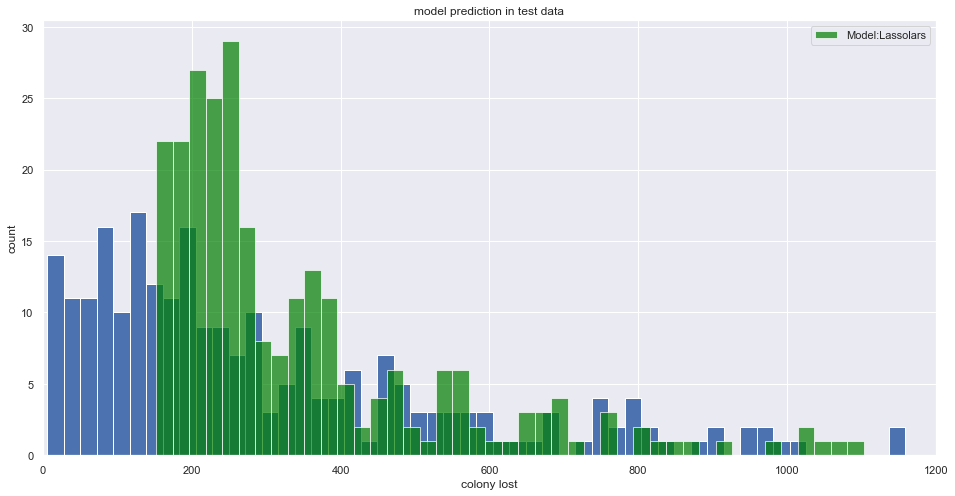

In [29]:
#visualise Lassolars model performance 
viz_test_perfomance(y_test)

### Conclusion:

- Our best model was LassoLars on predicting the bee colony loss.
- The model beat baseline by 35 %
- The bee colonies seem to be diminishing than thriving
- In 5 out of 7 years, there has been net loss in colonies
- There was biggest net gain in 2012 followed by biggest net loss in 2013
- More states are in net colony loss
- States like Wisconsin, Pennslyvania, Minnestota and California lead in biggest net loss in colonies
- Colonies seem to thrive in states like Oregon, North Carolina, Texas and Idaho
- Colonies diminsh more in winters than summers

Thanks for Reading!